**Marco Pezzella**

 You can send your homework on the marc.pezzman@gmail.com email address and share it on github. 

My email-address = aryaadvaith.satisha@student.kuleuven.be

# ML model Prediction for $C_2H_2$
### What to do: 
1. Build two models of your choice for predicting the states, using the vibrational and rotational numbers. Try to reach the chemical accuracy (~1 kcal/mol or ~0.05 eV).
2. Perform the same task adding the symmetry quantum numbers. How do the results change?


## RANDOM FOREST REGRESSION
$Without$ $Symmetry$ $QNs$

### Opening file

In [1]:
# Open the file in read mode
with open('C2H2_energylevels_2019-03-20.txt', 'r') as file:
    # Read each line in the file
    inputfile=[]
    for line in file:
        # reading each line
        inputfile.append(line.split())
        

In [2]:
import pandas as pd
x=pd.DataFrame(inputfile)
x.columns=x.iloc[0]
x=x.drop(0)
x

,v1,v2,v3,v4,l4,v5,l5,k,J,ef,op,Energy,Unc,NumTrans,u/g,Sym
1,0,0,0,0,0,0,0,0,1,e,ortho,2.353286,0.000000,204,g,sigma_g_plus
2,0,0,0,0,0,0,0,0,3,e,ortho,14.119512,0.000041,289,g,sigma_g_plus
3,0,0,0,0,0,0,0,0,5,e,ortho,35.297925,0.000042,306,g,sigma_g_plus
4,0,0,0,0,0,0,0,0,7,e,ortho,65.887099,0.000043,298,g,sigma_g_plus
5,0,0,0,0,0,0,0,0,9,e,ortho,105.885007,0.000043,306,g,sigma_g_plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,3,0,1,0,0,0,0,0,31,e,para,14172.875479,0.007071,2,u,sigma_u_plus
11210,2,2,1,0,0,0,0,0,21,e,para,14243.079656,0.004243,2,u,sigma_u_plus
11211,3,0,1,0,0,0,0,0,33,e,para,14321.985812,0.007071,2,u,sigma_u_plus
11212,2,2,1,0,0,0,0,0,23,e,para,14346.088023,0.004243,2,u,sigma_u_plus


In [3]:
import numpy as np
int_cols=["v1","v2","v3","v4","l4","v5","l5","k","J","NumTrans"]
float_cols=["Energy","Unc"]

for col in int_cols:
    x[col] = pd.to_numeric(x[col], errors='coerce').astype(np.int64)  #errors='coerce' handles non-numeric values

for col in float_cols:
    x[col] = pd.to_numeric(x[col], errors='coerce').astype(np.float64)

### Excluding the -1 values

In [4]:

if (x[int_cols] < 0).any().any():  #Check if ANY value across ANY column is <0
    print("Negative values found!")
    #Remove negative values:
    x[int_cols] = x[int_cols].mask(x[int_cols] < 0) # replaces negative values with NaN
    x = x.dropna() # remove rows with NaN values


Negative values found!


In [5]:
x.index=range(len(x))
x

,v1,v2,v3,v4,l4,v5,l5,k,J,ef,op,Energy,Unc,NumTrans,u/g,Sym
0,0,0,0,0,0.0,0,0.0,0,1,e,ortho,2.353286,0.000000,204,g,sigma_g_plus
1,0,0,0,0,0.0,0,0.0,0,3,e,ortho,14.119512,0.000041,289,g,sigma_g_plus
2,0,0,0,0,0.0,0,0.0,0,5,e,ortho,35.297925,0.000042,306,g,sigma_g_plus
3,0,0,0,0,0.0,0,0.0,0,7,e,ortho,65.887099,0.000043,298,g,sigma_g_plus
4,0,0,0,0,0.0,0,0.0,0,9,e,ortho,105.885007,0.000043,306,g,sigma_g_plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,3,0,1,0,0.0,0,0.0,0,31,e,para,14172.875479,0.007071,2,u,sigma_u_plus
8396,2,2,1,0,0.0,0,0.0,0,21,e,para,14243.079656,0.004243,2,u,sigma_u_plus
8397,3,0,1,0,0.0,0,0.0,0,33,e,para,14321.985812,0.007071,2,u,sigma_u_plus
8398,2,2,1,0,0.0,0,0.0,0,23,e,para,14346.088023,0.004243,2,u,sigma_u_plus


### THE ML model building

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_error

In [7]:
#For question1:
q1=["v1","v2","v3","v4","l4","v5","l5","k","J","Energy"]
dataset = x.loc[:,q1]

In [8]:
# Shuffle the dataset
dataset = dataset.sample(frac=1)

In [9]:
X = dataset.drop(['Energy'],axis=1)
Y = dataset['Energy']

In [10]:
dataset

,v1,v2,v3,v4,l4,v5,l5,k,J,Energy
6476,0,0,1,1,1.0,2,2.0,3,39,7176.482857
2112,0,0,1,0,0.0,2,0.0,0,42,6838.514239
716,0,0,0,0,0.0,2,0.0,0,41,3473.294367
5050,0,0,0,0,0.0,1,1.0,1,43,2949.143334
7854,0,3,0,0,0.0,4,2.0,2,17,9104.693034
...,...,...,...,...,...,...,...,...,...,...
4838,0,0,0,0,0.0,3,3.0,3,11,2343.531287
5072,0,0,0,1,1.0,3,1.0,2,14,3017.145785
5220,0,1,0,1,1.0,1,1.0,2,13,3516.614671
8159,0,3,1,1,1.0,0,0.0,1,14,9958.496814


### Hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

In [12]:
'''

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


param_grid = { 
    'n_estimators': [100, 500, 1000, 1500, 2000], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [6, 9, 15], 
#    'max_leaf_nodes': [3, 6, 15], 
}
grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)


'''

"\n\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\n\n\nparam_grid = { \n    'n_estimators': [100, 500, 1000, 1500, 2000], \n    'max_features': ['sqrt', 'log2', None], \n    'max_depth': [6, 9, 15], \n#    'max_leaf_nodes': [3, 6, 15], \n}\ngrid_search = GridSearchCV(RandomForestRegressor(), \n                           param_grid=param_grid) \ngrid_search.fit(X_train, y_train) \nprint(grid_search.best_estimator_)\n\n\n"

### Model Building

In [13]:
for i in range(1,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    rf_model = RandomForestRegressor(max_depth=15, max_features=None, n_estimators=2000)
    rf_model.fit(X_train, Y_train)
  
    y_pred_rf_est = rf_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_train)

    rmse= root_mean_squared_error(Y_test, y_pred_rf_est)
    r2 = r2_score(Y_test, y_pred_rf_est)
    mae = mean_absolute_error(Y_test, y_pred_rf_est)

    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"    ")

Root Mean Squared Error: 65.72184783791623
R^2 Score: 0.999436921955955
MAE: 26.799871998992682
    
Root Mean Squared Error: 55.71910679810134
R^2 Score: 0.9995854427192389
MAE: 25.79824225212764
    
Root Mean Squared Error: 56.871186761401766
R^2 Score: 0.9995649583057926
MAE: 25.640792504825047
    
Root Mean Squared Error: 63.195267219440474
R^2 Score: 0.9994468581704377
MAE: 26.763698963977678
    
Root Mean Squared Error: 49.982797165866515
R^2 Score: 0.9996618369744192
MAE: 23.166515416520426
    
Root Mean Squared Error: 86.36211267567084
R^2 Score: 0.9990199867343871
MAE: 26.45080297427929
    
Root Mean Squared Error: 54.72101549852431
R^2 Score: 0.9996123933168264
MAE: 24.30941041591394
    
Root Mean Squared Error: 86.84774409010915
R^2 Score: 0.998977178269049
MAE: 26.5225757115332
    
Root Mean Squared Error: 53.65680659181093
R^2 Score: 0.9995985359265548
MAE: 25.051803034196183
    


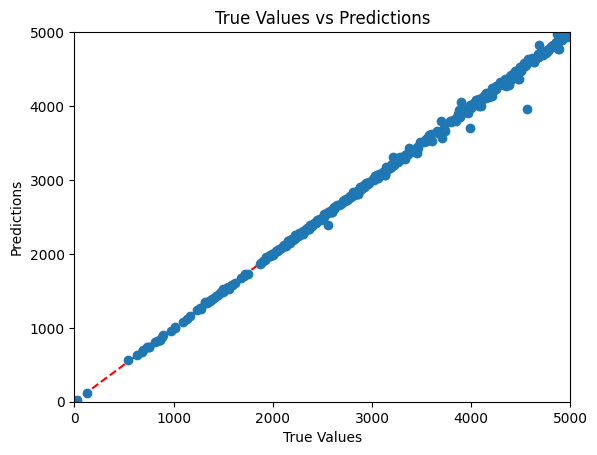

Overall MAE: 25.051803034196183
   
Importances of each feature
v3: 0.35532894182422775
v1: 0.2849838368781964
v2: 0.26294424025603175
J: 0.04876032406368613
v5: 0.025483977024226504
v4: 0.015047972025368676
k: 0.005277128159797417
l4: 0.0014216198533116497
l5: 0.0007519599151537002


In [14]:
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.plot([0, 10000], [0, 10000], color='red', linestyle='--')
plt.plot( Y_test,y_pred_rf_est,"o")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

overall_mae = mean_absolute_error(Y_test, y_pred_rf_est)
print(f"Overall MAE: {overall_mae}")

importances = rf_model.feature_importances_
feature_names = ["v1","v2","v3","v4","l4","v5","l5","k","J"]
sorted_indices = np.argsort(importances)[::-1]
print(f"   ")
print("Importances of each feature")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")

## RANDOM FOREST REGRESSION
$With$ $Symmetry$ $QNs$

In [15]:
#For question2:
q2=["v1","v2","v3","v4","l4","v5","l5","k","J","op","u/g","Energy"]
dataset2 = x.loc[:,q2]

$NOTE:$ 

ungerade = 1 and gerade = 0

para = 1 and ortho = 0

In [16]:
for i in dataset2.index:
    if dataset2.loc[i,"u/g"]=="u":
        dataset2.loc[i,"u/g"]=1
    else:
        dataset2.loc[i,"u/g"]=0
for i in dataset2.index:
    if dataset2.loc[i,"op"]=="para":
        dataset2.loc[i,"op"]=1
    else:
        dataset2.loc[i,"op"]=0

In [17]:
# Shuffle the dataset
dataset2 = dataset2.sample(frac=1)

In [18]:
X2 = dataset2.drop(['Energy'],axis=1)
Y2 = dataset2['Energy']

### Hyperparameter Tuning

In [19]:
'''

X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

param_grid = { 
    'n_estimators': [100, 500, 1000, 1500, 2000], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [6, 9, 15], 
#    'max_leaf_nodes': [3, 6, 15], 
}
grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)

'''


"\n\nX_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)\n\nparam_grid = { \n    'n_estimators': [100, 500, 1000, 1500, 2000], \n    'max_features': ['sqrt', 'log2', None], \n    'max_depth': [6, 9, 15], \n#    'max_leaf_nodes': [3, 6, 15], \n}\ngrid_search = GridSearchCV(RandomForestRegressor(), \n                           param_grid=param_grid) \ngrid_search.fit(X_train, y_train) \nprint(grid_search.best_estimator_)\n\n"

### Model Building

In [20]:
for i in range(1,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.20)
    rf_model = RandomForestRegressor(max_depth=15, max_features=None, n_estimators=1000)
    rf_model.fit(X_train, Y_train)
  
    y_pred_rf_est = rf_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_train)

    rmse= root_mean_squared_error(Y_test, y_pred_rf_est)
    r2 = r2_score(Y_test, y_pred_rf_est)
    mae = mean_absolute_error(Y_test, y_pred_rf_est)

    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"    ")

Root Mean Squared Error: 47.46289541510693
R^2 Score: 0.9997056803961155
MAE: 24.787509506270908
    
Root Mean Squared Error: 81.35758199850379
R^2 Score: 0.9991181997602334
MAE: 27.233927435877987
    
Root Mean Squared Error: 90.05422960153814
R^2 Score: 0.9989490173238045
MAE: 31.826500782511765
    
Root Mean Squared Error: 67.9146356219328
R^2 Score: 0.9993916862735317
MAE: 27.848284507286344
    
Root Mean Squared Error: 64.35786610335839
R^2 Score: 0.9994423230046698
MAE: 29.02447098355151
    
Root Mean Squared Error: 66.42907060060826
R^2 Score: 0.9994220897843398
MAE: 28.785922432568494
    
Root Mean Squared Error: 55.36510653996982
R^2 Score: 0.9995936329024604
MAE: 25.840064190414743
    
Root Mean Squared Error: 57.66169431543478
R^2 Score: 0.999535437023925
MAE: 27.59175659314661
    
Root Mean Squared Error: 67.88970133301865
R^2 Score: 0.9993315416039873
MAE: 30.146375126978015
    


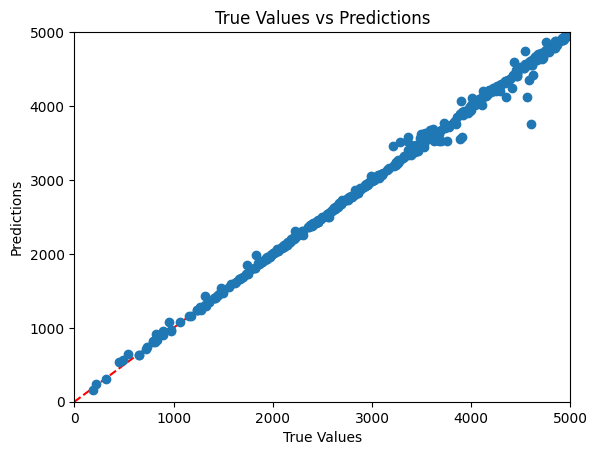

Overall MAE: 30.146375126978015
   
Importances of each feature
v3: 0.3691622407342617
v1: 0.2731808910931671
v2: 0.2587454946335347
J: 0.04936614450501544
v5: 0.025788902437089197
v4: 0.014881970121600105
k: 0.00446619089065526
op: 0.0025356642098344315
l4: 0.0012819371082702432
l5: 0.0005299025867083259
u/g: 6.066167986342429e-05


In [21]:
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.plot([0, 10000], [0, 10000], color='red', linestyle='--')
plt.plot( Y_test,y_pred_rf_est,"o")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

overall_mae = mean_absolute_error(Y_test, y_pred_rf_est)
print(f"Overall MAE: {overall_mae}")

importances = rf_model.feature_importances_
feature_names = ["v1","v2","v3","v4","l4","v5","l5","k","J","u/g","op"]
sorted_indices = np.argsort(importances)[::-1]
print(f"   ")
print("Importances of each feature")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")

The inclusion of the symmetry quantum numbers for the Random Forest model does not seem to influence the accuracy as much as seen from the MAE!

## KERNEL RIDGE REGRESSION
$Without$ $Symmetry$ $QNs$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Hyperparameter Tuning

In [23]:
'''

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


param_grid = { 
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'alpha': [0.1, 0.5, 1.0],
    'gamma': [0.1, 0.5, 1.0] 
}
grid_search = GridSearchCV(KernelRidge(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)


'''

'\n\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\n\n\nparam_grid = { \n    \'kernel\': ["linear", "poly", "rbf", "sigmoid"],\n    \'alpha\': [0.1, 0.5, 1.0],\n    \'gamma\': [0.1, 0.5, 1.0] \n}\ngrid_search = GridSearchCV(KernelRidge(), \n                           param_grid=param_grid) \ngrid_search.fit(X_train, y_train) \nprint(grid_search.best_estimator_)\n\n\n'

### Model Building

In [24]:
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    krr = KernelRidge(alpha=0.1, gamma=0.5, kernel='poly')
    krr.fit(X_train, y_train)
    
    y_pred_kr_est = krr.predict(X_test)
    y_pred_kr = krr.predict(X_train)
    
    rmse= root_mean_squared_error(y_test, y_pred_kr_est)
    r2 = r2_score(y_test, y_pred_kr_est)
    mae = mean_absolute_error(y_test, y_pred_kr_est)

    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"    ")



Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    
Root Mean Squared Error: 7.677403181329702
R^2 Score: 0.9999921853187691
MAE: 4.763997096299994
    


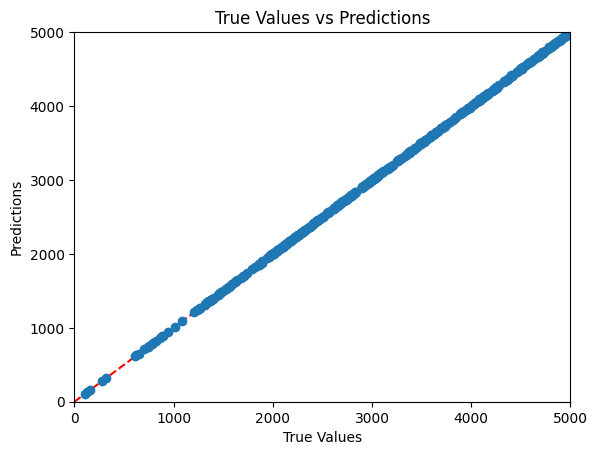

Overall MAE: 4.763997096299994


In [25]:
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.plot([0, 10000], [0, 10000], color='red', linestyle='--')
plt.plot( y_test,y_pred_kr_est,"o")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

overall_mae = mean_absolute_error(y_test, y_pred_kr_est)
print(f"Overall MAE: {overall_mae}")



## KERNEL RIDGE REGRESSION
$With$ $Symmetry$ $QNs$

### Hyperparameter Tuning

In [26]:
'''
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)
# Step 2: Train the Random Forest model (i guess kernel ridge regression here)

param_grid = { 
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'alpha': [0.1, 0.5, 1.0],
    'gamma': [0.1, 0.5, 1.0] 
}
grid_search = GridSearchCV(KernelRidge(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)



#y_pred_rf_est = rf_model.predict(X_test)
'''


'\n# Step 1: Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)\n# Step 2: Train the Random Forest model (i guess kernel ridge regression here)\n\nparam_grid = { \n    \'kernel\': ["linear", "poly", "rbf", "sigmoid"],\n    \'alpha\': [0.1, 0.5, 1.0],\n    \'gamma\': [0.1, 0.5, 1.0] \n}\ngrid_search = GridSearchCV(KernelRidge(), \n                           param_grid=param_grid) \ngrid_search.fit(X_train, y_train) \nprint(grid_search.best_estimator_)\n\n\n\n#y_pred_rf_est = rf_model.predict(X_test)\n'

### Model Building

In [27]:
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    krr = KernelRidge(alpha=0.1, gamma=0.1, kernel='poly')
    krr.fit(X_train, y_train)
    
    y_pred_kr_est = krr.predict(X_test)
    y_pred_kr = krr.predict(X_train)
    
    rmse= root_mean_squared_error(y_test, y_pred_kr_est)
    r2 = r2_score(y_test, y_pred_kr_est)
    mae = mean_absolute_error(y_test, y_pred_kr_est)

    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"    ")



Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    
Root Mean Squared Error: 4.306600399917368
R^2 Score: 0.9999975243136252
MAE: 3.3150814530853387
    


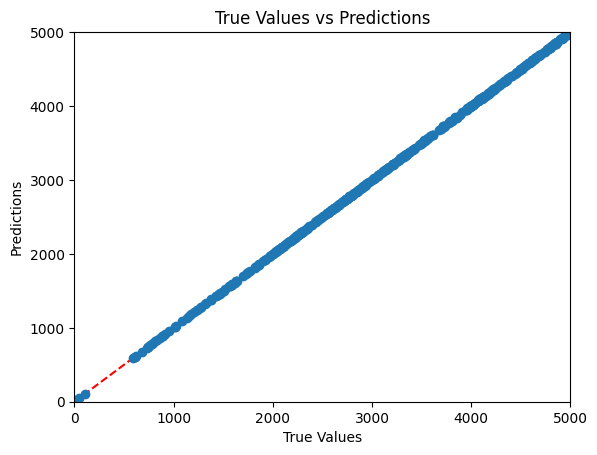

Overall MAE: 3.3150814530853387


In [28]:
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.plot([0, 10000], [0, 10000], color='red', linestyle='--')
plt.plot( y_test,y_pred_kr_est,"o")

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

overall_mae = mean_absolute_error(y_test, y_pred_kr_est)
print(f"Overall MAE: {overall_mae}")


The inclusion of symmetry quantum numbers does influence the result and makes the model better!!!
 
This also gives clarity that accuracy is not only parameter dependent but also model dependent.

## CLUSTERING
### What to do
3. Is it possible to clusterise the states based on their symmetries?

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Manual Parameter Tuning

In [30]:
max_iter = 100
init = 'k-means++'
n_init = 10

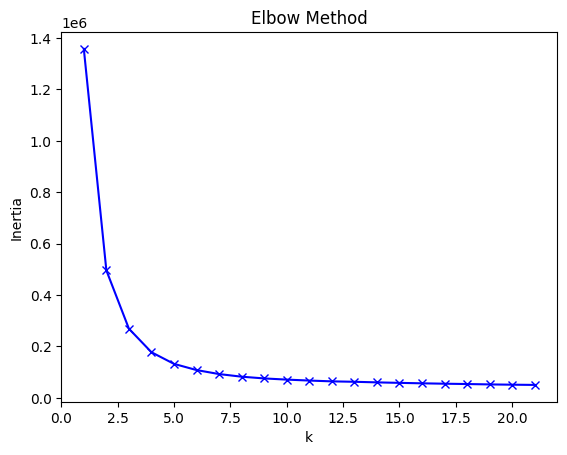

In [31]:
inertias = []
for k in range(1, 22):
    kmeans = KMeans(n_clusters=k, max_iter=max_iter, init=init, n_init=n_init, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 22), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

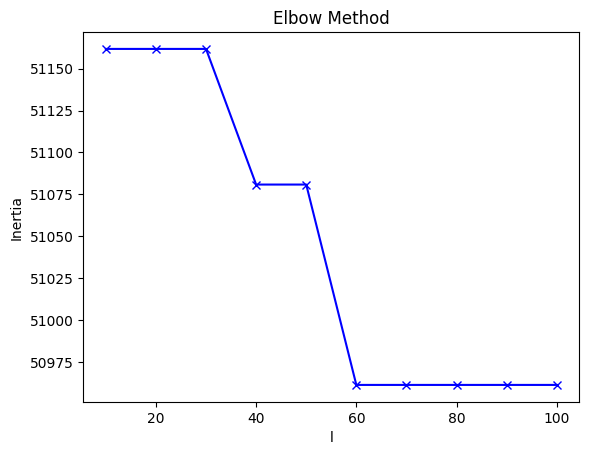

In [32]:
inertias = []
for l in [10,20,30,40,50,60,70,80,90,100]:
    kmeans = KMeans(n_clusters=20, max_iter=max_iter, init=init, n_init=l, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot([10,20,30,40,50,60,70,80,90,100], inertias, 'bx-')
plt.xlabel('l')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

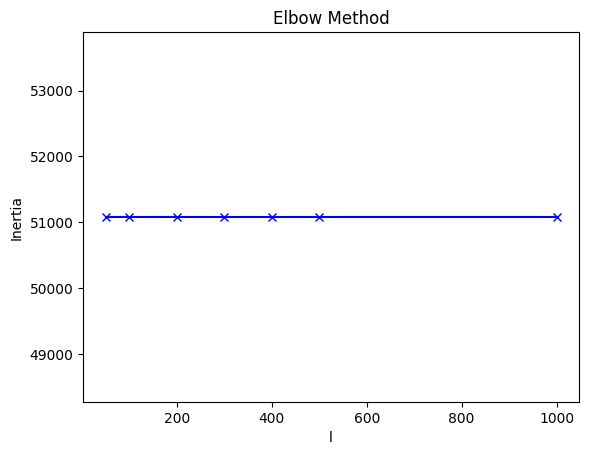

In [33]:
inertias = []
for m in [50, 100, 200, 300, 400, 500,1000]:
    kmeans = KMeans(n_clusters=20 ,max_iter=m, init=init, n_init=50, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot([50, 100, 200, 300, 400, 500,1000], inertias, 'bx-')
plt.xlabel('l')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

As seen from above graphs, the number of clusters parameter and the n_init parameter play a major role! Tuning these would make a stark difference in the results

### Clustering Algorithm with K-means

1
         
2
         
3
         
4
         
5
         
6
         
7
         
8
         
9
         
Cluster Centers (Centroids):
 [[-4.92520733e-01 -5.56465894e-01  2.61185080e+00 -5.74674899e-01
  -4.80236337e-01 -4.04594975e-01  1.25587118e-01 -3.03312516e-01
  -3.39752563e-01  1.15796146e-02  6.26315434e-01  1.22766902e+00
   3.40101638e-01]
 [-6.42258253e-01 -7.02196908e-01  1.97860448e+00  4.79696191e-01
   4.07672437e-01 -7.84702766e-01 -7.87958745e-01 -3.29013284e-01
  -2.94649910e-01  2.70485460e-02 -1.08530725e+00  5.94245667e-01
   8.61724505e-01]
 [-4.26686053e-01 -4.94404735e-01 -7.62155611e-01  3.72857267e-01
   8.28702346e-01  6.30903671e-02  4.76295827e-01  1.11993452e+00
  -7.84563717e-02  4.62675771e-02  8.57843719e-01 -1.25573673e+00
   1.22809547e+00]
 [-4.87819337e-01 -2.85058679e-01 -7.62155611e-01  9.13786910e-02
   9.14078114e-02 -4.05827290e-01 -8.68087556e-01 -6.68929523e-01
  -9.26633389e-02  7.19372001e-02 -1.16571350e+00 -1.40637634e+00
  -8.28601304

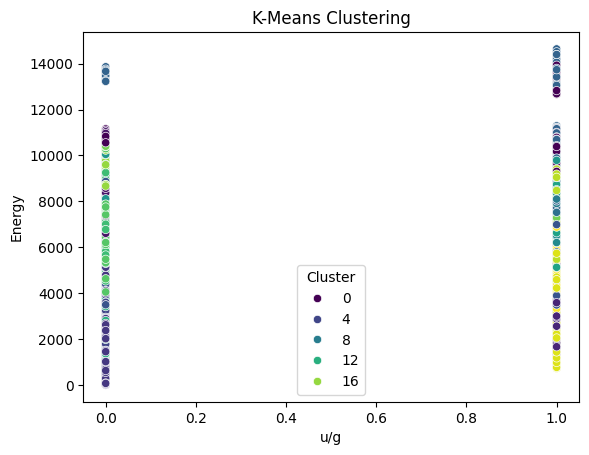

In [56]:
# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset2)

# Create and fit the model
for i in range(1,10):
    kmeans = KMeans(n_clusters=20, max_iter=50, init=init, n_init=100)
    kmeans.fit(scaled_data)
    print(i)
    print("         ")  


# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the original DataFrame
dataset2['Cluster'] = labels

# Get the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", kmeans.cluster_centers_)

# Check which cluster each data point belongs to
print("Cluster labels for each point:", kmeans.labels_)

# For a specific point, you can check its cluster

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=dataset2['u/g'], y=dataset2['Energy'], hue=dataset2['Cluster'],
                palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('u/g')
plt.ylabel('Energy')
plt.show()

1. As far as I can see, the clustering is not the best in terms of the symmetry quantum numbers. 
2. This could be due to it being binary (only 0 and 1).
3. This result could be improved through hyper-parameter tuning like GridSearchCV [I do not know how to perform it for qualitative models]


# Molecular Constant Prediction
### What to do 
1. Predict the molecular constants for the X(1SIGMA+g) and the b(3SIGMA-g). Compare the constants obtained for $^{12}C_2$ with the ones available from the [NIST database](https://webbook.nist.gov/cgi/inchi?ID=C12070154&Mask=1000#Diatomic).

### Extracting information from Files

In [35]:
# Open the file in read mode
with open('12C2__8states.states', 'r') as file:
    # Read each line in the file
    inputfile=[]
    for line in file:
        # reading each line
        inputfile.append(line.split())

In [36]:
import pandas as pd
x2=pd.DataFrame(inputfile)
x2=x2.drop(columns=0)
x2.columns=["Estate","g","J","unc","τ","g","+/−","ef", "State", "v", "Λ", "Σ" ,"Ω" ,"F{sym}", "idx", "src", "Eorigin"]
x2

,Estate,g,J,unc,τ,g,+/−,ef,State,v,Λ,Σ,Ω,F{sym},idx,src,Eorigin
0,0.000000,1,0,0.009813,Inf,0.0000,+,e,X(1SIGMA+g),0,0,0,0,F1,0,d,0.000000
1,1827.487599,1,0,0.000900,1.7058E+03,0.0000,+,e,X(1SIGMA+g),1,0,0,0,F1,0,m,1827.480518
2,3626.681661,1,0,0.001300,1.0804E+03,0.0000,+,e,X(1SIGMA+g),2,0,0,0,F1,0,m,3626.660054
3,5396.685747,1,0,0.001400,1.3408E+01,0.0000,+,e,X(1SIGMA+g),3,0,0,0,F1,0,m,5396.601921
4,6250.143654,1,0,0.001700,1.8124E-05,0.0000,+,e,b(3SIGMA-g),0,0,0,0,F3,1,m,6250.303047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44184,49037.738009,373,186,0.103409,nan,0.0108,-,f,a(3PIu),0,-1,0,-1,F2,186,d,49037.738009
44185,49481.549497,375,187,0.103409,nan,0.0107,-,e,a(3PIu),0,-1,0,-1,F2,187,d,49481.549497
44186,49923.172388,377,188,0.103409,nan,0.0107,-,f,a(3PIu),0,-1,0,-1,F2,188,d,49923.172388
44187,50368.038975,379,189,0.103409,nan,0.0106,-,e,a(3PIu),0,-1,0,-1,F2,189,d,50368.038975


In [37]:
database_12C2_1=x2[x2.loc[:,"State"]=="b(3SIGMA-g)"]
database_12C2_2=x2[x2.loc[:,"State"]=="X(1SIGMA+g)"]
database_12C2=pd.concat([database_12C2_1,database_12C2_2])
database_12C2

,Estate,g,J,unc,τ,g,+/−,ef,State,v,Λ,Σ,Ω,F{sym},idx,src,Eorigin
4,6250.143654,1,0,0.001700,1.8124E-05,0.0000,+,e,b(3SIGMA-g),0,0,0,0,F3,1,m,6250.303047
6,7698.245470,1,0,0.003300,1.4650E-05,0.0000,+,e,b(3SIGMA-g),1,0,0,0,F3,1,m,7698.406042
8,9124.170774,1,0,0.005500,1.2418E-05,0.0000,+,e,b(3SIGMA-g),2,0,0,0,F3,1,m,9124.385699
10,10528.070836,1,0,0.005300,1.0967E-05,0.0000,+,e,b(3SIGMA-g),3,0,0,0,F3,1,m,10528.304135
11,11909.995592,1,0,0.041028,9.7292E-06,0.0000,+,e,b(3SIGMA-g),4,0,0,0,F3,1,d,11909.995592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43945,47955.154299,341,170,0.009339,nan,0.0000,+,e,X(1SIGMA+g),1,0,0,0,F1,170,d,47955.154299
43949,48969.770866,341,170,0.087279,nan,0.0000,+,e,X(1SIGMA+g),2,0,0,0,F1,170,d,48969.770866
44001,47749.955003,345,172,0.009813,nan,0.0000,+,e,X(1SIGMA+g),0,0,0,0,F1,172,d,47749.955003
44004,48885.417521,345,172,0.009339,nan,0.0000,+,e,X(1SIGMA+g),1,0,0,0,F1,172,d,48885.417521


In [38]:
# Open the file in read mode
with open('13C2__8states.states', 'r') as file:
    # Read each line in the file
    inputfile=[]
    for line in file:
        # reading each line
        inputfile.append(line.split())

In [39]:
import pandas as pd
x3=pd.DataFrame(inputfile)
x3=x3.drop(columns=0)
x3.columns=["Estate","g","J","τ","g","+/−","ef", "State", "v", "Λ", "Σ" ,"Ω", "idx", "Eorigin"]
x3

,Estate,g,J,τ,g,+/−,ef,State,v,Λ,Σ,Ω,idx,Eorigin
0,0.000000,1,0,Inf,0.000000,+,e,X(1SIGMA+g),0,0,0,0,i,0.000000
1,635.522905,3,0,4.8619E+04,0.000000,+,e,a(3PIu),0,1,-1,0,i,635.519871
2,1756.634396,1,0,1.9724E+03,0.000000,+,e,X(1SIGMA+g),1,0,0,0,i,1756.627315
3,2190.712507,3,0,1.7571E+03,0.000000,+,e,a(3PIu),1,1,-1,0,i,2190.692389
4,3487.201834,1,0,1.0885E+03,0.000000,+,e,X(1SIGMA+g),2,0,0,0,i,3487.180227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93998,47528.689703,381,190,nan,0.010561,-,f,a(3PIu),0,-1,0,-1,d,47528.689703
93999,47953.461583,381,190,nan,0.000082,-,f,a(3PIu),0,-1,-1,-2,d,47953.461583
94000,48376.760527,381,190,nan,-0.010450,-,f,a(3PIu),1,-1,0,-1,d,48376.760527
94001,48527.696785,381,190,nan,0.010561,-,f,a(3PIu),2,-1,0,-1,d,48527.696785


In [40]:
database_13C2_1=x2[x2.loc[:,"State"]=="b(3SIGMA-g)"]
database_13C2_2=x2[x2.loc[:,"State"]=="X(1SIGMA+g)"]
database_13C2=pd.concat([database_13C2_1,database_13C2_2])
database_13C2

,Estate,g,J,unc,τ,g,+/−,ef,State,v,Λ,Σ,Ω,F{sym},idx,src,Eorigin
4,6250.143654,1,0,0.001700,1.8124E-05,0.0000,+,e,b(3SIGMA-g),0,0,0,0,F3,1,m,6250.303047
6,7698.245470,1,0,0.003300,1.4650E-05,0.0000,+,e,b(3SIGMA-g),1,0,0,0,F3,1,m,7698.406042
8,9124.170774,1,0,0.005500,1.2418E-05,0.0000,+,e,b(3SIGMA-g),2,0,0,0,F3,1,m,9124.385699
10,10528.070836,1,0,0.005300,1.0967E-05,0.0000,+,e,b(3SIGMA-g),3,0,0,0,F3,1,m,10528.304135
11,11909.995592,1,0,0.041028,9.7292E-06,0.0000,+,e,b(3SIGMA-g),4,0,0,0,F3,1,d,11909.995592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43945,47955.154299,341,170,0.009339,nan,0.0000,+,e,X(1SIGMA+g),1,0,0,0,F1,170,d,47955.154299
43949,48969.770866,341,170,0.087279,nan,0.0000,+,e,X(1SIGMA+g),2,0,0,0,F1,170,d,48969.770866
44001,47749.955003,345,172,0.009813,nan,0.0000,+,e,X(1SIGMA+g),0,0,0,0,F1,172,d,47749.955003
44004,48885.417521,345,172,0.009339,nan,0.0000,+,e,X(1SIGMA+g),1,0,0,0,F1,172,d,48885.417521


In [41]:
X3=database_12C2[['v', 'J']]
Y3=database_12C2['Estate']

In [42]:
X4=database_13C2[['v', 'J']]
Y4=database_13C2['Estate']

In [43]:
X3=pd.concat([X3,X4]).values
Y3=pd.concat([Y3,Y4]).values

I have combined the data of $^12C_2$ and $^13C_2$ thinking that both contribute towards the molecular constants and wanted to make use of downloading the isotope file haha (not sure if I was supposed to do so.)

### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

In [45]:
true_coefficients=[1470.4,11.1,1.4985,0.01634,0.00000622]

In [46]:
'''# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)
# Step 3: Train the Random Forest model

param_grid = { 
    'n_estimators': [1500, 2000, 5000], 
    'max_features': ['sqrt', None], 
    'max_depth': [ 10, 15, 20], 
    'max_leaf_nodes': [3, 6, 15], 
}
grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)
'''

"# Step 2: Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)\n# Step 3: Train the Random Forest model\n\nparam_grid = { \n    'n_estimators': [1500, 2000, 5000], \n    'max_features': ['sqrt', None], \n    'max_depth': [ 10, 15, 20], \n    'max_leaf_nodes': [3, 6, 15], \n}\ngrid_search = GridSearchCV(RandomForestRegressor(), \n                           param_grid=param_grid) \ngrid_search.fit(X_train, y_train) \nprint(grid_search.best_estimator_)\n"

### Model Building

In [47]:
for i in range(1,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size=0.20)
    rf_model = RandomForestRegressor(max_depth=15, max_features=None, max_leaf_nodes=15, n_estimators=2500)
    rf_model.fit(X_train, Y_train)
  
    y_pred_rf_est = rf_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_train)

    rmse= root_mean_squared_error(Y_test, y_pred_rf_est)
    r2 = r2_score(Y_test, y_pred_rf_est)
    mae = mean_absolute_error(Y_test, y_pred_rf_est)
    
    X_test = X_test.astype(float)
    
    X_transformed = np.column_stack([
        (X_test[:, 0] + 0.5), 
        (X_test[:, 0] + 0.5) ** 2,
        (X_test[:, 1] * (X_test[:, 1] + 1) * (X_test[:, 0] + 0.5)),  # (a3 + a4 * (x1 + 0.5)) * x2 * (x2 + 1)
        (X_test[:, 1] ** 2) * (X_test[:, 1] + 1) ** 2  # a5 * (x2^2) * (x2 + 1)^2
    ])
# Fit the linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_transformed, y_pred_rf_est)
    predicted_coefficients = linear_model.coef_
#
#predicted_coefficients = linear_model.coef_
    print(f"Predicted Coefficients:")
    print(f"a1: {predicted_coefficients[0]}")
    print(f"a2: {predicted_coefficients[1]}")
    print(f"a3: {predicted_coefficients[2]}")
    print(f"a4: {predicted_coefficients[3]}")
    print(f"    ")

    print(f"Difference in coefs /ratio")
    print(f"a1: {(true_coefficients[1] - predicted_coefficients[0])/true_coefficients[1]}")
    print(f"a2: {(true_coefficients[2] - np.abs(predicted_coefficients[1]))/true_coefficients[2]}")
    print(f"a3: {(true_coefficients[3] - np.abs(predicted_coefficients[2]))/true_coefficients[3]}")
    print(f"a4: {(true_coefficients[4] - np.abs(predicted_coefficients[3]))/true_coefficients[4]}")

    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"    ")

Predicted Coefficients:
a1: 1219.6409445152249
a2: -10.621637785784893
a3: 0.012786042439840618
a4: 4.113190093854029e-05
    
Difference in coefs /ratio
a1: -108.87756256893918
a2: -6.088180037227156
a3: 0.21750046267805276
a4: -5.6128458100547105
Root Mean Squared Error: 2626.6776183449983
R^2 Score: 0.9472855192778741
MAE: 2092.6901682674456
    
Predicted Coefficients:
a1: 1222.5475946506776
a2: -10.711282996323423
a3: 0.013978982794402205
a4: 4.1165613178011014e-05
    
Difference in coefs /ratio
a1: -109.1394229415025
a2: -6.148003334216498
a3: 0.1444930970378088
a4: -5.6182657842461445
Root Mean Squared Error: 2624.411213881197
R^2 Score: 0.9465131749160104
MAE: 2073.4628538738502
    
Predicted Coefficients:
a1: 1210.471112214421
a2: -10.530099743795864
a3: 0.013828845495829878
a4: 4.015844341560037e-05
    
Difference in coefs /ratio
a1: -108.05145155084875
a2: -6.027093589453363
a3: 0.15368142620380185
a4: -5.456341385144754
Root Mean Squared Error: 2658.710349266152
R^2 Scor

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Step 2: Transform features
degree = 4  # Change this to fit a different degree polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_test)

# Step 3: Fit the model
model = LinearRegression()
model.fit(X_poly, y_pred_rf_est)
predicted_coefficients = model.coef_

we=predicted_coefficients[1]
wexe=np.abs(predicted_coefficients[3])
Be=np.abs(predicted_coefficients[5])
ae=np.abs(predicted_coefficients[8])
De=np.abs(predicted_coefficients[14])


print(we,wexe,Be,De,ae,true_coefficients)
print(f"Difference in coefs /ratio")
print(f"we: {(true_coefficients[0] - we)/true_coefficients[0]}")
print(f"wexe: {(true_coefficients[1] - wexe)/true_coefficients[1]}")
print(f"BE: {(true_coefficients[2] - Be)/true_coefficients[2]}")
print(f"ae: {(true_coefficients[3] - ae)/true_coefficients[3]}")
print(f"De: {(true_coefficients[4] - De)/true_coefficients[4]}")

1213.1031357363147 22.19114050896876 1.9343166119659414 0.00015906392516985179 0.11954636907797042 [1470.4, 11.1, 1.4985, 0.01634, 6.22e-06]
Difference in coefs /ratio
we: 0.17498426568531378
wexe: -0.9992018476548434
BE: -0.29083524322051485
ae: -6.3161792581377245
De: -24.5729783231273


As far as I can see the difference in the coefficients are not too far with respect to the predicted and experimental results! Thanks to hyperparameter tuning I think except for the $D_e$ and the $\alpha_e$

$\textbf{Possible hypothesis:}$
1. The value of coefficients of $D_e$ is very small and therefore small changes can exaggerate the errors [in the order of $10^{-6}$ !!!]
2. A similar tale canbe said for the $\alpha_e$ since it also has coefficients in the order of $10^{-2}$


# Predicting the Specific Heat and Partition Function 
### What to do

2. Use  a Kernel model to reproduce the [heat capacity](https://exomol.com/db/C2/12C2/8states/12C2__8states.cp)  and [partition function](https://exomol.com/db/C2/12C2/8states/12C2__8states.pf) of $^{12}C_2$.

## Specific Heat Prediction

       T       cp
0  200.0  40.2882
1  201.0  40.3866
2  202.0  40.4836
3  203.0  40.5791
4  204.0  40.6731
  


C:\Users\satis\AppData\Local\Temp\ipykernel_9724\1784984484.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  heatcap = pd.read_csv("12C2__8states.cp", names=["T","cp"], delim_whitespace=True)


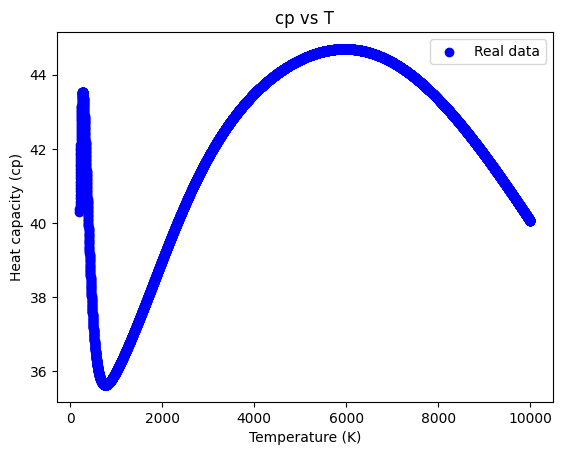

In [49]:
################################### Kernel Regression for the specific heat ###############################################

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Read the data
heatcap = pd.read_csv("12C2__8states.cp", names=["T","cp"], delim_whitespace=True)
print(heatcap.head())
print(f"  ")

# Defining the variables
X = heatcap['T'].values.reshape(-1, 1)
Y = heatcap['cp'].values

#Previsualize how the data is behaving
plt.scatter(X, Y, color='blue', label='Real data')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat capacity (cp)')
plt.title('cp vs T')
plt.legend()
plt.show()


#Definition of the sets of training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Hyperparameter Tuning

In [50]:
'''
param_grid = {
    'alpha': [ 1e-2, 1e-1, 1],
    'kernel': ['rbf','poly'],
    'gamma': [1e-1, 1, 10]  
}
grid_search = GridSearchCV(KernelRidge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
'''

'\nparam_grid = {\n    \'alpha\': [ 1e-2, 1e-1, 1],\n    \'kernel\': [\'rbf\',\'poly\'],\n    \'gamma\': [1e-1, 1, 10]  \n}\ngrid_search = GridSearchCV(KernelRidge(), param_grid, cv=5, scoring=\'neg_mean_squared_error\')\ngrid_search.fit(X_train, Y_train)\n\nbest_model = grid_search.best_estimator_\nprint(f"Best Parameters: {grid_search.best_params_}")\n'

### Model Building

RSME: 0.7583189946222121
R^2: 0.9196208857042012
MAE: 0.38077665257758964


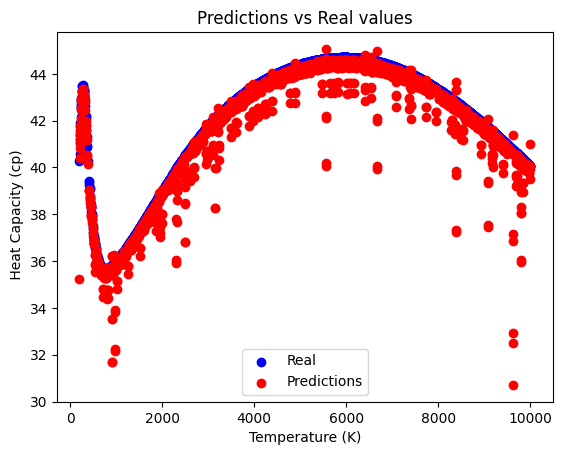

In [51]:
# Defining the model
krr = KernelRidge(alpha= 0.01, gamma= 0.1, kernel= 'rbf')
krr.fit(X_train, Y_train)

#Make predictions
Y_pred_train = krr.predict(X_train)
Y_pred_test = krr.predict(X_test)

#Seeing how good/bad the things are going
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2 = r2_score(Y_test, Y_pred_test)
mae = mean_absolute_error(Y_test, Y_pred_test)

print(f"RSME: {rmse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")

#Graphing the predictions
plt.scatter(X_test, Y_test, color='blue', label='Real')
plt.scatter(X_test, Y_pred_test, color='red', label='Predictions')
plt.xlabel('Temperature (K)')
plt.ylabel(' Heat Capacity (cp)')
plt.title('Predictions vs Real values')
plt.legend()
plt.show()

In [52]:
# Predicción para nuevas temperaturas
new_temp = np.array([257.5, 301.23, 758.56, 46.89, 895.69]).reshape(-1, 1)
predictions_new = krr.predict(new_temp)

print(f"Temperaturas: {new_temp.ravel()}")
print(f"Predictions: {predictions_new}")

Temperaturas: [257.5  301.23 758.56  46.89 895.69]
Predictions: [43.14697124 42.9158864  35.55893073  0.         35.6512874 ]


## Partition Function Prediction

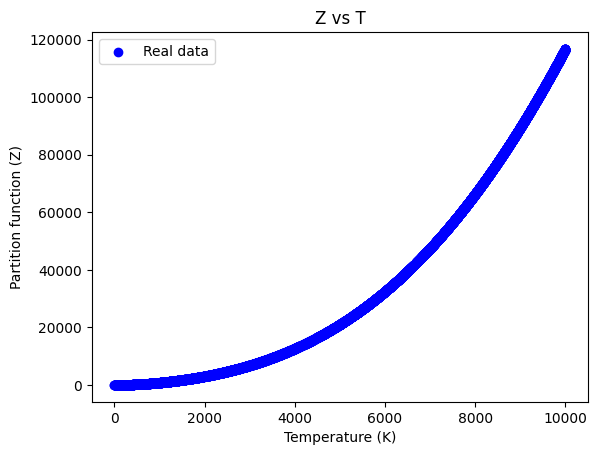

In [53]:
############################## Kernel Regression for the partition function ##############################################

partfunc = pd.read_csv("12C2__8states.pf", names=["T","pf"], sep="\s+")

# Defining the variables
X = partfunc['T'].values.reshape(-1, 1)
Y = partfunc['pf'].values

#Previsualize how the data is behaving
plt.scatter(X, Y, color='blue', label='Real data')
plt.xlabel('Temperature (K)')
plt.ylabel('Partition function (Z)')
plt.title('Z vs T')
plt.legend()
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### Hyperparameter Tuning

In [54]:
'''
param_grid_part = {
    'alpha': [1e-2, 1e-1, 1],
    'kernel': ['rbf','poly','sigmoid'],
    'gamma': [1e-1, 1]
}
grid_search_part = GridSearchCV(KernelRidge(), param_grid_part, cv=5, scoring='neg_mean_squared_error')
grid_search_part.fit(X_train, Y_train)

best_model_part = grid_search_part.best_estimator_
print(f"Best parameters: {grid_search_part.best_params_}")
'''

'\nparam_grid_part = {\n    \'alpha\': [1e-2, 1e-1, 1],\n    \'kernel\': [\'rbf\',\'poly\',\'sigmoid\'],\n    \'gamma\': [1e-1, 1]\n}\ngrid_search_part = GridSearchCV(KernelRidge(), param_grid_part, cv=5, scoring=\'neg_mean_squared_error\')\ngrid_search_part.fit(X_train, Y_train)\n\nbest_model_part = grid_search_part.best_estimator_\nprint(f"Best parameters: {grid_search_part.best_params_}")\n'

### Model Building

C:\Users\satis\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


RSME: 91.00185928508022
R^2: 0.9999924129086577
MAE: 75.14862063031728


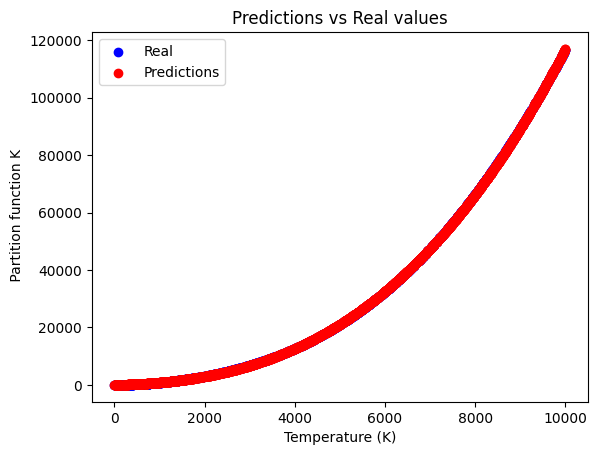

In [55]:
# Defining the model
krr = KernelRidge(alpha= 0.1, gamma= 0.1, kernel = 'poly')
krr.fit(X_train, Y_train)

#Make predictions
Y_pred_train = krr.predict(X_train)
Y_pred_test = krr.predict(X_test)

#Seeing how good/bad the things are going
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2 = r2_score(Y_test, Y_pred_test)
mae = mean_absolute_error(Y_test, Y_pred_test)

print(f"RSME: {rmse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")

#Graphing the predictions
plt.scatter(X_test, Y_test, color='blue', label='Real')
plt.scatter(X_test, Y_pred_test, color='red', label='Predictions')
plt.xlabel('Temperature (K)')
plt.ylabel(' Partition function K')
plt.title('Predictions vs Real values')
plt.legend()
plt.show()

**For both task, please follow the workflow [from the Notebook2 used during the hands-on](https://github.com/marcpezz/ML_presentation/tree/main/Notebook2)**